In [34]:
from sklearn.datasets import load_iris
dataset=load_iris()
print(dataset.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [35]:
import seaborn as sns
df=sns.load_dataset('iris')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
X=df.iloc[:,:-1]
y=dataset.target

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train[0]

array([-0.4134164 , -1.46200287, -0.09951105, -0.32339776])

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'X[3] <= -0.594\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'X[2] <= 0.513\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.15384615384615385, 0.6428571428571429, 'X[3] <= 0.488\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'X[3] <= 0.691\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.38461538461538464, 0.5, 'X[2] <= 0.63\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'X[3] <= 0.421\ngini = 0.444\nsamples = 6\nvalue = [0, 2

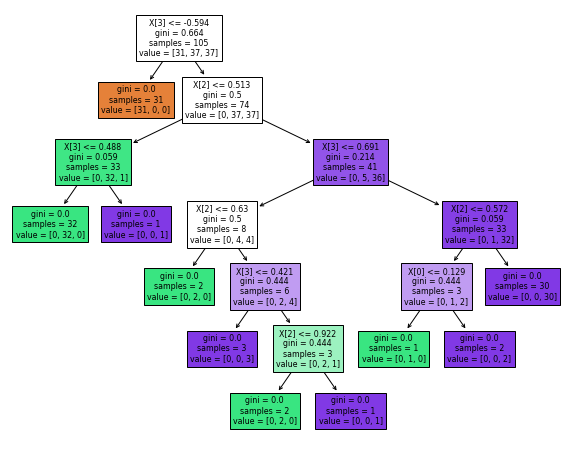

In [40]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
tree.plot_tree(classifier,filled=True)

## post prunning

[Text(0.4, 0.8333333333333334, 'X[2] <= -0.829\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 0.691\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]')]

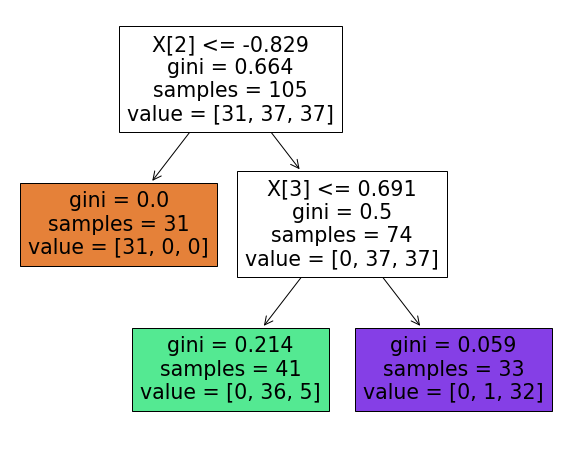

In [41]:
classifier_po_pru=DecisionTreeClassifier(max_depth=2)
classifier_po_pru.fit(X_train,y_train)
plt.figure(figsize=(10,8))
tree.plot_tree(classifier_po_pru,filled=True)

In [42]:
y_pred_1=classifier.predict(X_test)
y_pred_post_pru=classifier_po_pru.predict(X_test)

In [43]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [44]:
y_pred_post_pru

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [46]:
from sklearn.metrics import accuracy_score, classification_report
score1=accuracy_score(y_test,y_pred)
score2=accuracy_score(y_test,y_pred_post_pru)
score1,score2

(1.0, 1.0)

## Preprunning

In [52]:
parameters={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log']
}

In [59]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
clf=GridSearchCV(classifier,parameters,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)
clf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [63]:
new_classifier=DecisionTreeClassifier(criterion='gini',max_depth=3,max_features='sqrt',splitter='best')
new_classifier.fit(X_train,y_train)
y_pred_post_prunning=new_classifier.predict(X_test)
score_post_prunning=accuracy_score(y_pred_post_prunning,y_test)
score_post_prunning

1.0